# Spotify Data Models and Analysis

## Nikita Shetty, Kashish Pandey, Katherine Fontan


Spotify Data Set Variable Descrition:

- Track_id - Song unique ID
- Track_name - Song Name
- Track_artist - Song Artist
- Track_popularity - Song Popularity (0-100) where higher is better
- Track_album_id - Album unique ID
- Track_album_name - Song album name
- Track_album_release_date - Date when album released
- Playlist_name- Name of playlist
- Playlist_id - Playlist ID
- Playlist_genre- Playlist genre
- Playlist_subgenre- Playlist subgenre
- Danceability- Danceability describes how suitable a track is for dancing 
- Energy	- Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- Key - Key of the track
- Loudness - The overall loudness of a track in decibels (dB)
- Mode - Mode indicates the modality (major or minor) 
- Speechiness - Speechiness detects the presence of spoken words in a track
- Acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- Instrumentalness - Predicts whether a track contains no vocals
- Liveness - Detects the presence of an audience in the recording. Live or recording
- Valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
- tempo	- the estimated tempo of a track in beats per minute (BPM) 
- Duration_ms - Duration of song in milliseconds



Using the Spotify Data Set and the variables above our analysis will be completed in order to answer the following questions:

- **1) What clusters can we find between loudness and energy?**

- **2) Which variables are the least useful in gathering information about the popularity of a song?**

- **3) Is there an association between the duration and popularity of songs?**

- **4) Using danceability, energy, and loudness, can we accurately predict whether a song will be  popular?**

- **5) Can we accurately predict the genre of a song based on the set predictors?**

- **6) Which genres and subgenres show up the most in the data? Which are the most popular?**

- **7) Can we appropriately cluster songs by genre using album name, track popularity and artist name?**

- **8) Is there a hierarchical relationship between the variables?**

- **9) Would PCA help us reduce dimensionality and produce a model that can accurately predict a song's popularity?**

In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.api as sm
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.linear_model import Lasso
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.neighbors import NearestNeighbors


from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.tree import DecisionTreeClassifier

In [11]:
spotify = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv")
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [12]:
spotify.dropna()
spotify = spotify.drop_duplicates(subset = "track_name")

# 1) What clusters can we find between tempo and energy?

In [16]:
predictors = ["tempo", "energy"] 
X = spotify[predictors]
z = StandardScaler()
X[predictors] = z.fit_transform(X)
EM = GaussianMixture(n_components = 3) 
EM.fit(X)

GaussianMixture(n_components=3)

In [17]:
clusterEM = EM.predict(X)
silhouette_score(X, clusterEM)

0.376908836011207

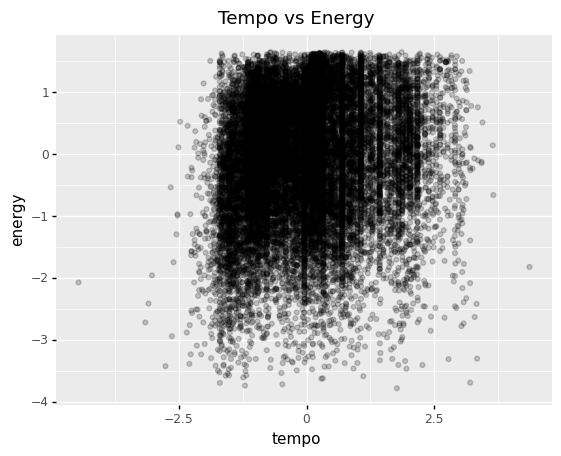

<ggplot: (338254481)>

In [18]:
(ggplot(X, aes("tempo", "energy")) 
 + geom_point(alpha = 0.2) + ggtitle("Tempo vs Energy"))

#### Caption 1 
This ggplot is simply plotting tempo against energy. I did this in order to visualize first which clustering algorithm would best suit this data. However, because it is not very seperated or had any specific cluster shape, I had to try all four algorithms and compare the silhouette scores as well as the way the model clustered the points.

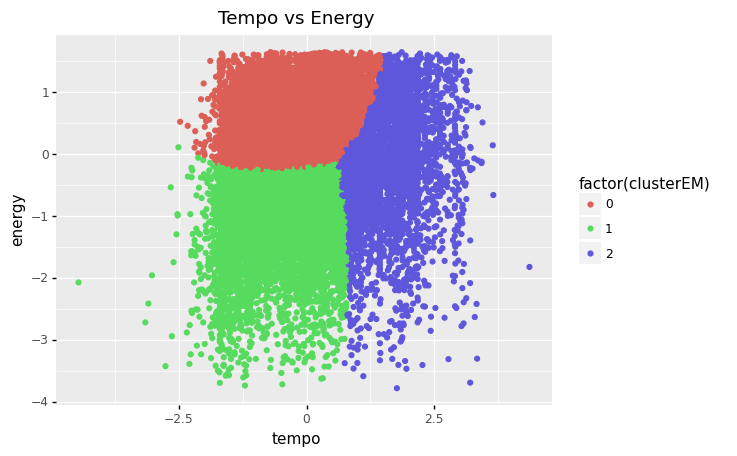

<ggplot: (338105561)>

In [19]:
X["cluster"] = clusterEM
(ggplot(X, aes("tempo", "energy", color = "factor(clusterEM)")) 
 + geom_point() + ggtitle("Tempo vs Energy"))

### Caption 2
The clustering algorithm I chose here was an Expectation-Maximization with Gaussian Mixture that compares tempo vs. energy using a total of 3 clusters. There is good cohesion among the clusters here; cohesion refers to cluster members that are similar, and there is good cohesion when there are small distances between the data points in the cluster. However, the separation is quite poor; separation refers to how close the clusters are to one another. Additionally, the elliptical assumption of EM did not really seem to shape any of the clusters into an 'elliptical' shape. Overall, it did do a good job and showing all 3 clusters clearly. 

### Question 1 Answer:

The clusters found between tempo and energy are poorly separated but highly cohesive! When further analyzing the model performance, the silhouette score came out to 0.379, which is also very low; the Silhouette score is a measure of both cohesion and separation. Furthermore, the closer the silhouette score is to 1, it means there is very good cohesion and separation. One thing to note, two clusters as n_components gave a higher silhouette score; however, it wasn't enough to thoroughly analyze the clusters. So I stuck with three instead, and I thought it very clearly showed the three separate clusters(with very poor separation, though).


### Further Analysis on why I choose EM:

When I had tried KMeans, the spherical assumption really did not help in this problem. The clusters were even less separated than the Expectation-Maximization with Gaussian Mixture model; moreover, the clusters were fully overlapping one another, and it was an absolute mess to interpret. The same things happened with DBSCAN and Hierarchical Agglomerative Clustering. DBSCAN works best when the clusters are very dense and separated; DBSCAN does not perform well with overlapping/touching clusters, which this model definitely has. Finally, Hierarchical Agglomerative Clustering also did not work well and provided an even lower silhouette score.  Hierarchical Agglomerative Clustering works best when there is some sort of Hierarchy in the data, and in this model there wasn't any. Overall, even though Expectation Maximization with Gaussian Mixture model has an elliptical assumption and there aren't necessarily elliptical-shaped clusters, it performed the best in terms of the graphing, and the silhouette score was highest when using this clustering algorithm.

### Why I Changed the Original Question:

Originally I had the question posed as what clusters can we find between loudness and energy. However, after plotting loudness and energy on ggplot, I quickly realized that no matter which clustering algorithm or number of clusters/components I chose, there was a severe lack of separation(similar to EM except even worse). I found that there was no clear way to conduct analysis. So I switched the question to tempo and energy instead; I was able to better analyze these 'clusters' (even though they are not separate and cohesive whatsoever).

# 2) Which variables are the least useful in gathering information about the popularity of a song?

In [20]:
features = ['energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [21]:
x = spotify[features]
y = spotify["track_popularity"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

z = StandardScaler()
x_train[features] = z.fit_transform(x_train[features])
x_test[features] = z.transform(x_test[features])

In [22]:
reg = Lasso(alpha= 0.6)
reg.fit(x_train, y_train)
print("training mse: ", mean_absolute_error(y_train, reg.predict(x_train)))
print("testing mse : ", mean_absolute_error(y_test, reg.predict(x_test)))

training mse:  19.077000568354407
testing mse :  18.75684575890018


In [23]:
coef = pd.DataFrame({"Coefs":reg.coef_, 
                     "Features": features})
coef = coef.append({"Coefs": reg.intercept_, "Features": "intercept"}, ignore_index = True)

In [24]:
coef

,Coefs,Features
0,-2.696390,energy
1,0.000000,key
2,1.980241,loudness
3,0.000000,mode
4,-0.000000,speechiness
5,0.471267,acousticness
6,-2.064363,instrumentalness
7,-0.334416,liveness
8,0.000000,valence
9,0.000000,tempo


###  Question 2 Answer:
After setting alpha equal to 0.6, I found that the least helpful variables in gathering information about a song's popularity are key, mode, speechiness, valence, and tempo. These were the least helpful because the lasso model (which is a variable selector) essentially zeroed out the least useful variables for the model. Moreover, when examining how the model actually performed, the MSE for training came out to 19.07, and the MSE for testing came out to 18.75. MSE is a loss function, and it is a measure of how well the model is doing; the lower the MSE, the better and the higher, the worse. Train and test were quite close to one another in this case. Additionally, both train and test have relatively low MSE's meaning that the model is performing quite well! 

In [25]:
# dropping the intercept in order to analyze the graph more effectively
coef_noIntercept = coef.drop(coef.index[11], axis = 0)

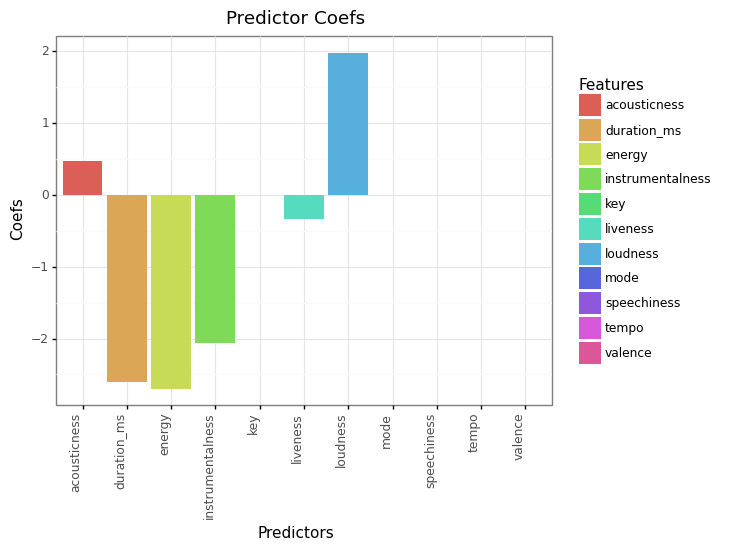

<ggplot: (332805761)>

In [26]:
(ggplot(coef_noIntercept, aes(x = "Features", y = "Coefs", fill = "Features")) + 
 stat_summary(geom = "bar") + ggtitle("Predictor Coefs") + 
 labs(x = "Predictors", y = "Coefs") + theme_bw() +
 theme(axis_text_x  = element_text(angle = 90, hjust = 1)))


### Caption 1
In order to better the model, I created this bar chart to clearly show which variables got zeroed out and which ones were remaining within the model. It is interesting to see that duration_ms, energy, instrumentalness, and liveness all had negative coeffients. Only Accouticness, valence and loudness had postive coeffients. Finally, key, mode, speechiness and tempo all do not have a bar because Lasso esentially removed them from the model.

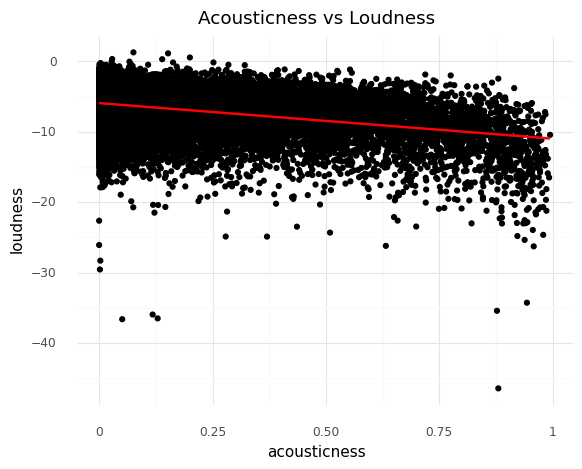

<ggplot: (338705893)>

In [27]:
(ggplot(spotify, aes(x = "acousticness", y = "loudness")) + ggtitle("Acousticness vs Loudness") + geom_point()+ geom_smooth(colour = "red") + theme_minimal())

### Caption 2

In this plot, you can see the two highest positive coefficients plotted against each other, acousticness and loudness. There seems to be a relationship between the two because when examining the plot, as acousticness increases, loudness slowly decreases. But generally, the data points are quite close to the regression line. When looking at acousticness between 0.8 to 1, the data points begin to become less condensed and start to spread out a bit more. Whereas, when looking at acoustiness between 0 to 0.5, for the majority of the data points, it stayed pretty close to the regression line and less spread out overall; there were a few points spread out, but far than the overall spread of points between 0.8 to 1.

# 3) Is there an association between the duration and popularity of songs?

In [28]:
predictor = ["duration_ms"]
X = spotify[predictor]
Y = spotify["track_popularity"]

In [29]:
zscore = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(spotify[predictor], spotify["track_popularity"], test_size=0.3)
zscore.fit(X_train)

X_train = zscore.transform(X_train)
X_test = zscore.transform(X_test)
Xz_train = X_train
Xz_test = X_test

LR = LinearRegression().fit(Xz_train,y_train)
y_pred = LR.predict(Xz_test)
y_preds = LR.predict(Xz_train)

In [30]:
coefficient = pd.DataFrame({"Coef": LR.coef_,
              "Name": predictor})

coefficient = coefficient.append({"Coef": LR.intercept_,
                    "Name": "intercept"}, ignore_index = True)

In [31]:
coefficient

,Coef,Name
0,-3.413775,duration_ms
1,39.809991,intercept


For every 1 unit increase in duration_ms, there is a 3.413775 decrease in popularity

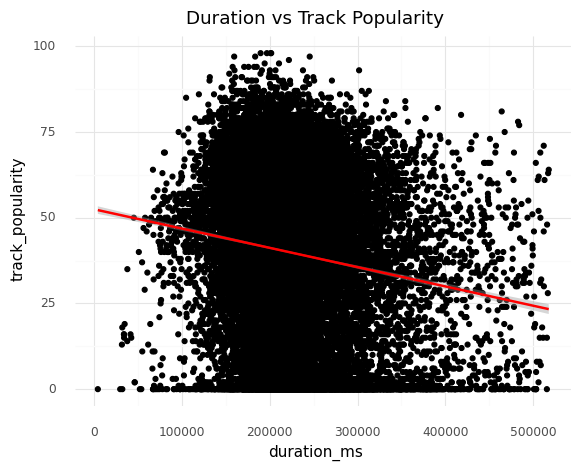

<ggplot: (339798281)>

In [32]:
(ggplot(spotify, aes(x = "duration_ms", y = "track_popularity"))+ ggtitle("Duration vs Track Popularity") + geom_point()+ geom_smooth(colour = "red") + theme_minimal())

### Caption 1
In this graph, you can see duration plotted against track popularity. It seems that songs that are either less than 100000 ms and greater than 500000 ms (about 8 minutes) long seem to be less popular. This generally means songs that are less than two minutes and longer than eight tend to be less popular; which makes sense; on the one hand, if you think about it, you wouldn't want a song you're listening to on the radio song to be over eight minutes long, and you wouldn't want it to be too short either. Between 150000 ms (2 and half minutes) and 300000 ms (5 minutes) seem to have the most popular tracks. The most popular track seen by this plot was around the 200000 ms range (a little more than 3 minutes). There were less popular songs all across the board from 0 to 500000 ms, meaning that the duration of a song does not guarantee popularity!

In [33]:
mean_squared_error(y_test, y_pred)

539.282985226459

In [34]:
r2_score(y_train, y_preds)

0.021340007299087027

In [35]:
true_vs_preds = pd.DataFrame({"predict": y_pred,"trueValue": y_test}) 
true_vs_preds

,predict,trueValue
26835,39.913442,27
25716,42.082385,27
4200,38.279075,52
25889,33.696109,35
8069,38.196939,25
...,...,...
30899,40.678386,52
27732,38.421444,31
13017,44.697739,15
31347,40.688397,66


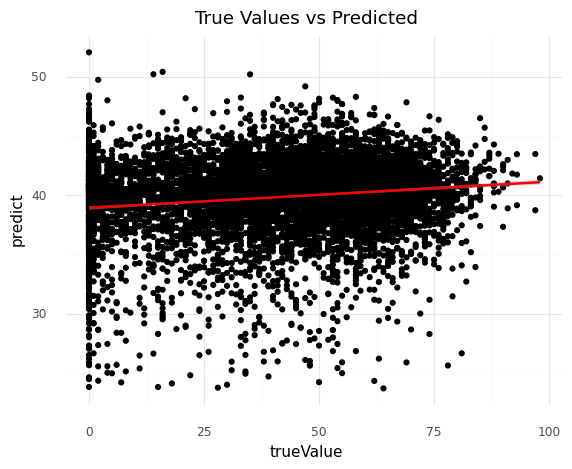

<ggplot: (333870297)>

In [37]:
(ggplot(true_vs_preds, aes(x="trueValue", y = "predict")) + ggtitle("True Values vs Predicted") + geom_point() + geom_smooth(colour = "red") + theme_minimal())

### Caption 2
The residual plot is showcasing that there is a slight upward trend between the true and predicted values. The data points are not clearly a linear pattern due to the fact a lot of the points are quite distanced from the regression line. Furthermore, when looking at the actual predicted and true values from the data frame right above this graph, the model got only 1 out of the ten rows somewhat accurately (for example: row, 20944, predicted:39.181884, true:41). This isn't even a good prediction, but in comparison to the others, it did the best. This showcases the models guessing was a bit off, which is very clearly seen with true values at 0, but the predicted values were ranging from 15 to about 50!

### Question 3 Answer:
In order to determine whether there was a relationship between the duration of a song and its popularity, I performed linear regression. I wanted to analyze the coefficient and see if there was any positive relationship between the two. The coefficient for duration came out to be -3.53. Moreover, from there, I analyzed the MSE and R2 values. The MSE for this model came out to 539.28, meaning the model is not performing too well. The R2 came out to 0.02, which is also very bad. Having a high MSE and low R2 means that showcases that there is a pretty high variance between predicted and true values. Moreover, the relationship between duration and popularity isn't very linear, although there is an upward trend in the data in the residual plot.

# **4) Using danceability, energy, and loudness, can we accurately predict whether a song will be  popular?**


In [96]:
predictors = ["danceability", "energy", "loudness"]
X = spotify[predictors]
Y = spotify["track_popularity"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify["track_popularity"], test_size=0.3)

zscore = StandardScaler()
zscore.fit(X_train)

Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

lr = LinearRegression()
lr.fit(Xz_train,y_train)

LinearRegression()

In [98]:
#interpret the coef
coefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": lr.intercept_,
                    "Name": "intercept"}, ignore_index = True)

In [99]:
coefficients

,Coef,Name
0,0.884656,danceability
1,-5.558816,energy
2,4.785189,loudness
3,39.667438,intercept


In [100]:
# predictions using training set
popTrain_pred = lr.predict(Xz_train) 

In [101]:
# predictions using testing set
popTest_pred = lr.predict(Xz_test) 

In [102]:
mean_squared_error(y_train, popTrain_pred)

528.6729640229033

In [45]:
mean_squared_error(y_test, popTest_pred)

521.3802457958441

In [46]:
r2_score(y_test, popTest_pred)

0.034228629584607706

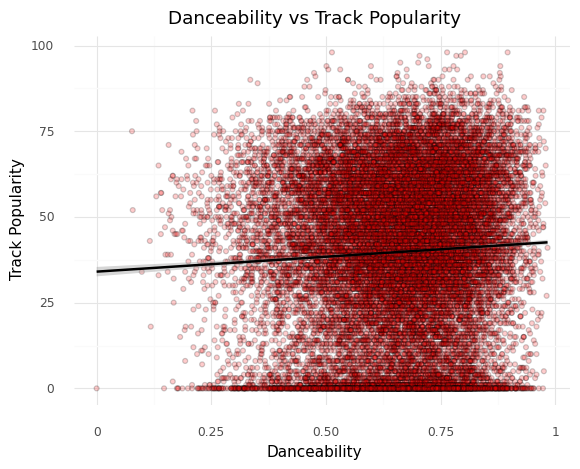

<ggplot: (337093393)>

In [47]:
(ggplot(spotify, aes (x = "danceability", y = "track_popularity")) 
+ geom_point(alpha = .2, fill = "red") + 
theme_minimal() + 
geom_smooth(method = "lm") + 
xlab("Danceability") + 
ylab("Track Popularity") +
ggtitle("Danceability vs Track Popularity"))

**Caption:** The graph between danceability and track popularity is not linear, as there is no distinct direction the points are lined up in. The data is mostly clustered around the right middle of the graph. When looking for a linear model, I'm looking for the data points in the graph to be distributed in a line formation with either a positive or negative slope so that lower or higher x values generally have higher or lower corresponding y values. Since this graph does not show that, it violates the linearity assumption.

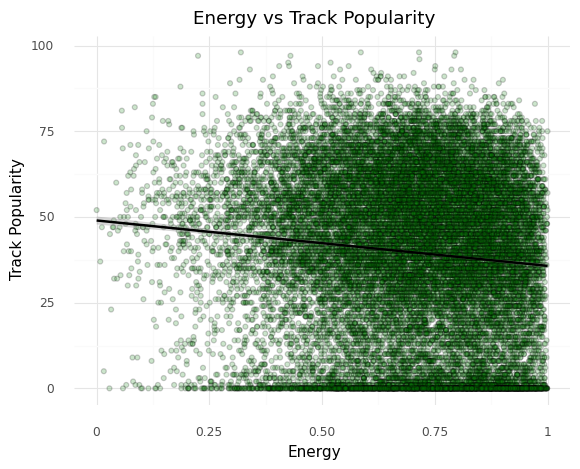

<ggplot: (339801625)>

In [48]:
(ggplot(spotify, aes (x = "energy", y = "track_popularity")) 
+ geom_point(alpha = .2, fill = "green") + 
theme_minimal() + 
geom_smooth(method = "lm") + 
xlab("Energy") + 
ylab("Track Popularity") +
ggtitle("Energy vs Track Popularity"))

**Caption:** The graph between energy and track popularity is linear, as there is a negative slope in the points. The data is mostly clustered around the right of the graph, but there are more points with lower track popularity when energy is higher. When looking for a linear model, I'm looking for the data points in the graph to be distributed in a line formation with either a positive or negative slope so that lower or higher x values generally have higher or lower corresponding y values. Since this graph does show that, it doesn't violate the linearity assumption.

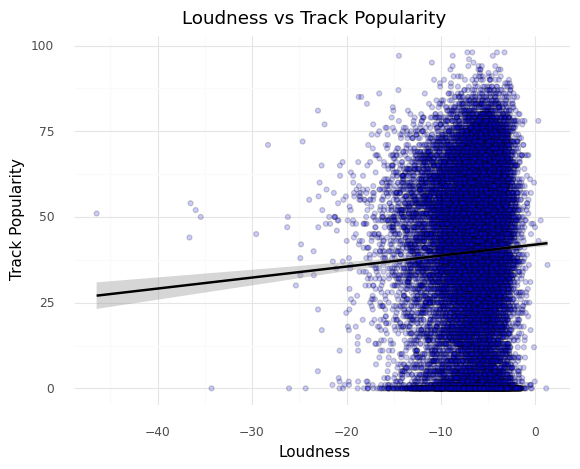

<ggplot: (8786742880681)>

In [24]:
(ggplot(spotify, aes (x = "loudness", y = "track_popularity")) 
+ geom_point(alpha = .2, fill = "blue") + 
theme_minimal() + 
geom_smooth(method = "lm") + 
xlab("Loudness") + 
ylab("Track Popularity") +
ggtitle("Loudness vs Track Popularity"))

**Caption:** The graph between loudness and track popularity is not linear, as there is a no slope in the points. The data is mostly clustered around the right of the graph, but there are more points with lower track popularity when energy is higher. When looking for a linear model, I'm looking for the data points in the graph to be distributed in a line formation with either a positive or negative slope so that lower or higher x values generally have higher or lower corresponding y values. Since this graph does show that, it doesn't violate the linearity assumption.

In [50]:
true_vs_resid = pd.DataFrame({"predict": popTest_pred,
                             "residuals": y_test - popTest_pred})
true_vs_resid.head()

,predict,residuals
5315,46.256346,-38.256346
27683,32.154529,-30.154529
32308,39.715384,-19.715384
8431,43.544544,-15.544544
32402,34.562693,-7.562693


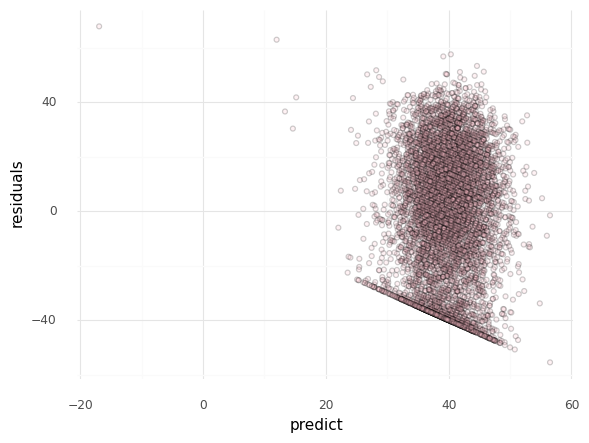

<ggplot: (344803597)>

In [51]:
(ggplot(true_vs_resid, aes(x = "predict", y = "residuals")) + 
 geom_point(alpha = 0.2, fill = "pink") + 
theme_minimal())

**Caption:** Linear regression assumes that the error is around the same throughout the model. If the plot of residuals has a lot of the points clustered in a certain area, it means that the model is better at predicting in some parts of the model than in others, which is a bad sign that it's a good model. This residual plot is clustered around the top right of the graph a little bit too much and the points are not evenly spread out throughout the graph, which means that it violates the homoscedacity assumption.

In [52]:
true_vs_pred = pd.DataFrame({"predict": popTest_pred,"trueV": y_test}) 
true_vs_pred.head()

,predict,trueV
5315,46.256346,8
27683,32.154529,2
32308,39.715384,20
8431,43.544544,28
32402,34.562693,27


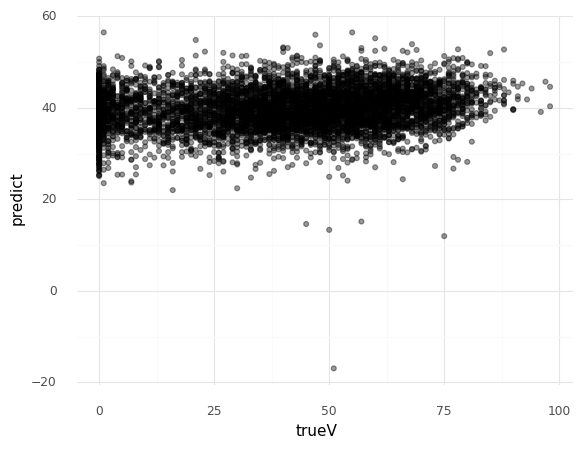

<ggplot: (337093529)>

In [53]:
(ggplot(true_vs_pred, aes(x="trueV", y = "predict")) + 
 geom_point(alpha = 0.4) +
 theme_minimal())

**Caption:** This graph shows the true values of track popularity versus the values predicted by the model. It does not have a strong linear relationship which is not a good sign that this is a strong model. It does show that the model was better at predicting when tracks had high popularity than when they had low popularity. However, this graph also tells us that the model is consistently predicting high track popularity even when the true popularity is low, showing us it's not very accurate, which is consistent with the high mean squared error and low r-squared values this model resulted in.

**How the model did + answer to the question:** The model performed pretty poorly, as shown by the high mean squared error and very low r-squared value. The MSE shows the amount of error that the model has by comparing the predicted values to the actual values. The difference between the two is squared to make the sum the errors and then divide that by the number of data points to find the average, or mean, squared error. Since our MSE is pretty high (528 for train and 521 for test), it is not promising because that means that the real values are far from the ones predicted by the model on average. The model is not overfit because the testing error is less than the training error. The R-Squared represents how much the prediction improves in the regression model versus just the baseline mean model. The R-squared of 0.034 is really low, which suggests that only around 3.4% of the variation in track popularity is explained by the model. Since some linearity and the homoscedacity assumptions are violated, the MSE is high, and the R-square is extremely low, I would say this model is not very good at predicting popularity and I would not use it to accurately predict how popular a song is based on danceability, energy, and loudness.

#  **5) Can we accurately predict the genre of a song based on the set predictors?**

In [13]:
predictors = ["danceability", "energy", "valence", "acousticness", "instrumentalness", "loudness"]
X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify["playlist_genre"], test_size=0.2)
X_train.head()

,danceability,energy,valence,acousticness,instrumentalness,loudness
5254,0.613,0.634,0.4960,0.017300,0.084400,-7.375
2885,0.556,0.817,0.4230,0.019500,0.000024,-4.442
32401,0.639,0.984,0.1890,0.001780,0.000855,-1.793
28226,0.687,0.496,0.0632,0.320000,0.796000,-8.383
763,0.690,0.805,0.7990,0.000232,0.739000,-11.522


In [14]:
zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)
myLogit = LogisticRegression(penalty = "none")
myLogit.fit(Xz_train,y_train)

LogisticRegression(penalty='none')

In [15]:
trainPreds = myLogit.predict(Xz_train)
accuracy_score(y_train,trainPreds)

0.40831556503198296

In [16]:
testPreds = myLogit.predict(Xz_test)
accuracy_score(y_test,testPreds)

0.408955223880597

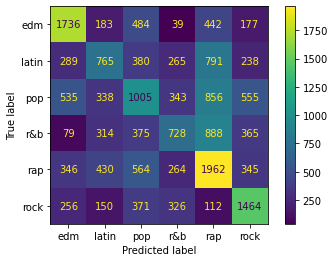

In [17]:
plot_confusion_matrix(myLogit,Xz_train, y_train)

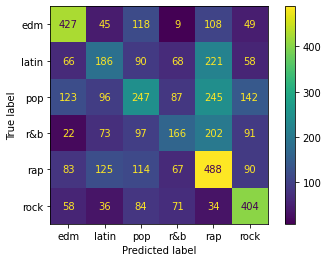

In [18]:
plot_confusion_matrix(myLogit,Xz_test, y_test)

**How the model did:** The accuracy score for this model was 40.8% for the training set and 41.4% for the testing set, which is pretty below average for a model. This means that the model predicted the correct genre for each song about 40% of the time, which is not the most useful if we want this model to be able to accurately predict which genre a track will be from the danceability, energy, valence, acousticness, instrumentalness, and loudness of the song. This model is not overfit, as the testing accuracy is higher than the training. Looking at the confusion matrix, we can see that the model was the most accurate at predicting EDM, rap, and rock, but did not do as well at predicting latin, pop, and r&b genres for tracks. An interesting note is that the model predicted that a lot of latin, pop, and r&b songs were rap based on the predictors.

In [19]:
coefficients = pd.DataFrame({"Coef":myLogit.coef_[0],"Name": predictors})

In [20]:
coefficients["Odds"] = np.exp(coefficients["Coef"])

In [21]:
coefficients

,Coef,Name,Odds
0,0.416259,danceability,1.516278
1,0.653256,energy,1.921788
2,-0.645957,valence,0.524161
3,-0.338694,acousticness,0.712700
4,0.572672,instrumentalness,1.772999
5,0.306736,loudness,1.358983


In [22]:
true_vs_pred = pd.DataFrame({"predict": testPreds,"trueV": y_test})
true_vs_pred.head()

,predict,trueV
20114,edm,latin
30606,pop,edm
19446,rap,latin
8494,pop,rap
32646,edm,edm


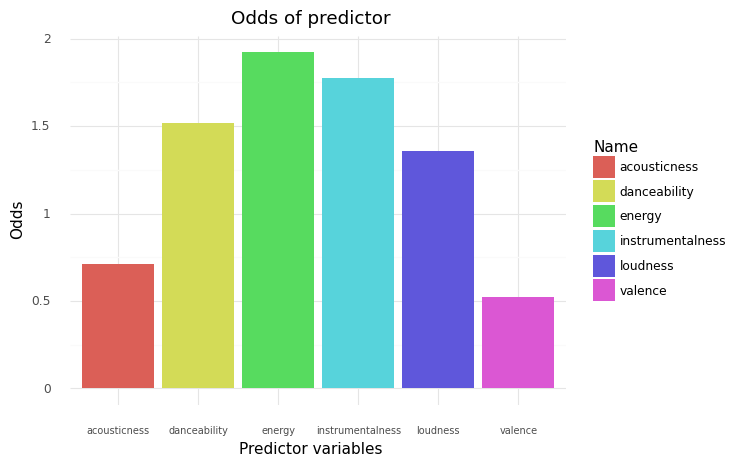

<ggplot: (8786747942425)>

In [23]:
(ggplot(coefficients, aes(x="Name", y = "Odds", 
                            fill = "Name")) + 
 stat_summary(geom = "bar") + 
 ggtitle("Odds of predictor") +
 xlab("Predictor variables") + 
 ylab("Odds") + theme_minimal() + 
 theme(axis_text_x = element_text(size = 7)))

**Caption:** This graph shows the odds of each predictor and their impact on the predicted genres. I converted the coefficients to odds, as they are easier to understand than log(odds), and are constant, unlike probability. Odds are how many times an event is more likely that the event will happen as it will not happen. Since danceability, energy, instrumentalness, and loudness all have odds greater than 1, they have a positive impact on the genre while acousticness and valence have a negative impact. 

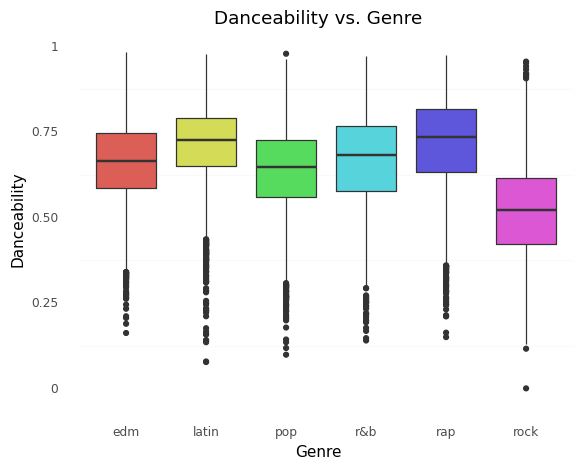

<ggplot: (340953053)>

In [65]:
(ggplot(spotify, aes(x = "playlist_genre", 
 y = "danceability", fill = "playlist_genre")) + 
 geom_boxplot()+ theme_minimal() + 
 labs(title = "Danceability vs. Genre")+ 
 labs(x= "Genre") + labs(y="Danceability") + 
 theme(panel_grid_major_x = element_blank(), 
       panel_grid_major_y = element_blank(), 
       legend_position = "none"))

**Caption:** This graph shows which genres have higher danceability. Rap and latin music are shown to have the highest levels of danceability while rock has the lowest levels. All of the genres have outliers on the lower end of the scale of danceability, as seen by the black dots at the bottom of the graph, and rock and pop have some on the upper end of the danceability scale.

**Answer to the Question:** I don't believe that this model can accurately predict a song's genre based on the danceability, energy, valence, acousticness, instrumentalness, and loudness of the track. Because the accuracy was only about 40% with this model, I don't think that that is high enough to use this model in attempts to get an accurate reading of the genre of that track. The model may be able to be used to predict EDM, rap, and rock music since those are the genres it was best at predicting, but for the other genres it did pretty poorly. 

# **6) Which genres and subgenres show up the most in the data? Which are the most popular?**

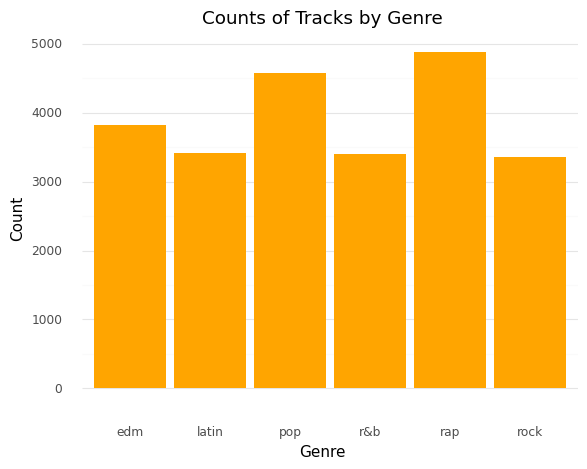

<ggplot: (340953901)>

In [66]:
(ggplot(spotify, aes(x = "playlist_genre")) + 
 geom_bar(fill = "orange") + 
 theme_minimal() + 
 theme(panel_grid_major_x = element_blank()) +
 ggtitle("Counts of Tracks by Genre") +
 labs(x = "Genre", y = "Count"))

**Caption:** This barchart visualizes all the genres as well as how many tracks are listed in the data as those genres. The chart shows that the genre with the most tracks in the dataset is rap, followed by pop and edm. There are about equal numbers of latin, r&b, and rock tracks within this dataset. 

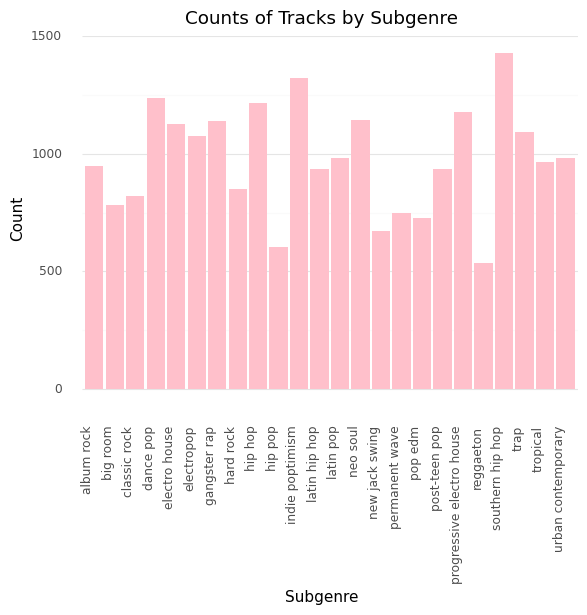

<ggplot: (340884401)>

In [67]:
(ggplot(spotify, aes(x = "playlist_subgenre")) + 
 geom_bar(fill = "pink") + 
 theme_minimal() +
 theme(axis_text_x  = element_text(angle = 90, hjust = 1),
      panel_grid_major_x = element_blank()) +
ggtitle("Counts of Tracks by Subgenre") +
 labs(x = "Subgenre", y = "Count"))

**Caption:** This barchart visualizes all the subgenres as well as how many tracks are listed in the data as those subgenres. The chart shows that the subgenre with the most tracks in the dataset is southern hip hop, followed by indie poptimism and dance pop. There are the lowest number of tracks in the reggaeton subgenre, as well as hip pop and new jack swing.

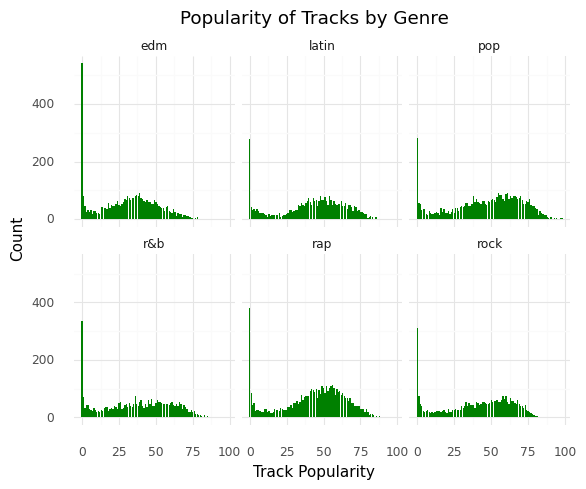

<ggplot: (336696453)>

In [68]:
(ggplot(spotify, aes(x = "track_popularity")) + 
 geom_bar(fill = "green") + 
 facet_wrap("playlist_genre") +
 theme_minimal() + 
 ggtitle("Popularity of Tracks by Genre") +
 labs(x = "Track Popularity", y = "Count"))

**Caption:** These charts show the track popularity and count of tracks for each genre. Pop seems to have the highest counts of tracks with higher popularities closer to 100, followed by rock. Latin and rap music tend to fall around popularity 50, while EDM has the most tracks at around 35-40. R&B has pretty even counts distributed throughout popularities up until around 80. EDM has the most number of tracks with popularity levels 0-10, followed by rap and R&B.

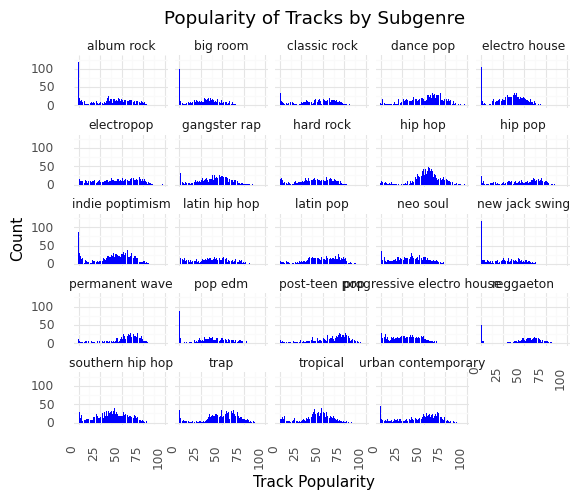

<ggplot: (337734857)>

In [69]:
(ggplot(spotify, aes(x = "track_popularity")) + 
 geom_bar(fill = "blue") + 
 theme_minimal() +
 facet_wrap("playlist_subgenre") +
 ylim(0, 130) +
 theme(axis_text_x  = element_text(angle = 90, hjust = 1)) +
 ggtitle("Popularity of Tracks by Subgenre") +
 labs(x = "Track Popularity", y = "Count"))

**Caption:** These charts show the track popularity and count of tracks for each subgenre. Dance pop seems to have the highest counts of tracks with higher popularities closer to 100, followed by post teen pop, latin pop, and indie poptimism. This makes sense, seeing as how pop music stands for songs that are popular at the time. Hip hop and trap music tend to fall around popularity 50. The subgenres with the highest number of tracks with popularity 0-10 are album rock, new jack swing, big room, and electro house.

**Answer to the question:** Unsurprisingly, genres and subgenres with the term pop in them tended to be more popular, simply because by definition this genre has more popular music in it. The dataset itself has the most amounts of rap, pop, and edm music. It also had different numbers of tracks for all the subgenres as well. This could affect some of our models, and should be taken into account when using this dataset and the genres in any of our other questions, especially when trying to predict genre/subgenre.

### 7) Can we appropriately cluster songs using track popularity, danceability, energy  and instrumentalness ?


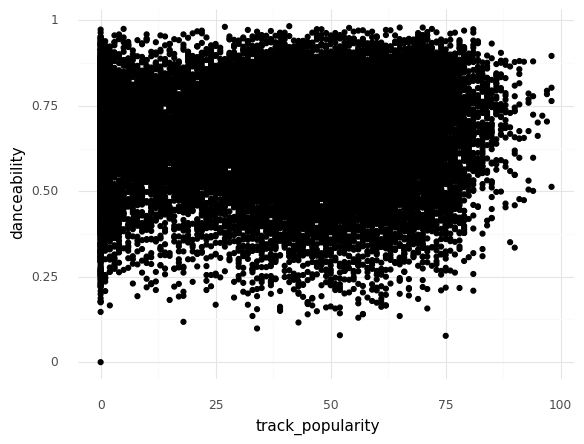

<ggplot: (331976257)>

In [70]:
features = ["track_popularity", "danceability", "energy", "instrumentalness"]

X = spotify[features]

z = StandardScaler()

X[features] = z.fit_transform(X)


(ggplot(spotify, aes("track_popularity","danceability")) + geom_point() + theme_minimal())


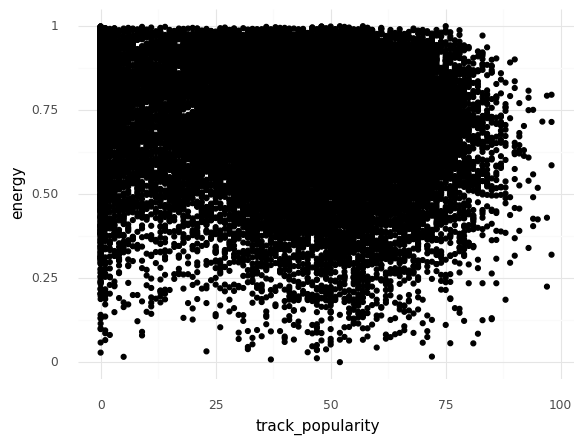

<ggplot: (343583165)>

In [71]:
(ggplot(spotify, aes("track_popularity", "energy")) + geom_point() + theme_minimal())

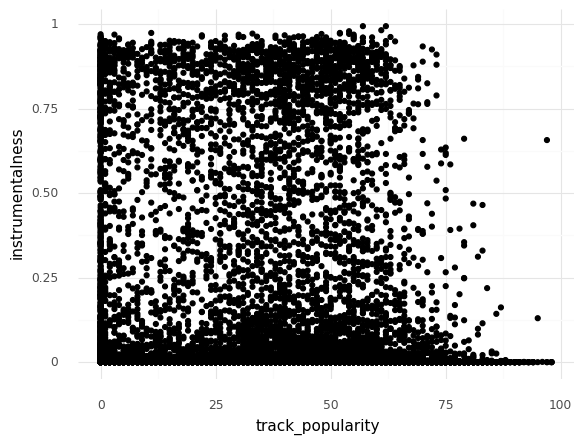

<ggplot: (343167717)>

In [72]:
(ggplot(spotify, aes("track_popularity", "instrumentalness")) + geom_point() + theme_minimal())

### **Caption 1**

The ggplot is ploting track_popularity against danceability. track_popularity against energy and track_popularity against instrumentalness. This is done in order to visualize the relationship between the data and see what potential algortithm would work best for the variables that are chosen in this data frame. As you can see there is not a lot of  degree of separation between the data and so DBSCAN, EM, and K-means clustering will be used and compared against each other in order to asnwer the question posed.

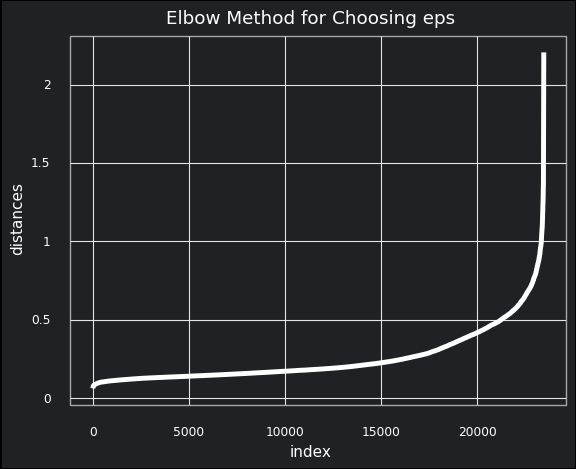

<ggplot: (338424105)>

In [75]:
mins = 10
nn = NearestNeighbors(mins + 1)

nn.fit(X)

distances, neighbors = nn.kneighbors(X)
distances = np.sort(distances[:, mins], axis = 0)


distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

### **Caption 2**

DBSCAN requires hyperparameters during its modeling, one of them is eps which signifies how far we should look away from a point and its neighbors.  One way to decide on an appropriate level of eps is by looking at the data. The graph above is called the elbow method and basically you look at the distances ploted and decide on one when the shape of the curve changes/bends into an "elbow". In this case we see that a good eps for this data is 0.5 

In [76]:
db = DBSCAN(eps = 0.5, min_samples = 10).fit(X)


labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]

X["assignments"] = db.labels_

df_clustered = X.loc[(X.assignments >= 0)]

print("DBSCAN Shilhoette Score (No Noise): ", silhouette_score(df_clustered[["track_popularity", "danceability", "energy", "instrumentalness"]], df_clustered["assignments"]))

print("DBSCAN Overall Score: ", silhouette_score(X[["track_popularity", "danceability", "energy", "instrumentalness"]], X["assignments"]))



DBSCAN Shilhoette Score (No Noise):  0.35538471551640266
DBSCAN Overall Score:  0.27749418932783126


In [77]:
km = KMeans(n_clusters = 10) 
km.fit(X)

clusterKM = km.predict(X) 
X["clustersKM"] = clusterKM

print("K-Means Shilhouette Score: ", silhouette_score(X[["track_popularity", "danceability", "energy", "instrumentalness"]], clusterKM))

K-Means Shilhouette Score:  0.2327223548752822


In [78]:
EM = GaussianMixture(n_components = 10)
EM.fit(X)

clusterEM = EM.predict(X)
X["clustersEM"] = clusterEM

print("EM Shilhouette Score: ", silhouette_score(X[["track_popularity", "danceability", "energy", "instrumentalness"]], clusterEM))

EM Shilhouette Score:  0.20479118409293043


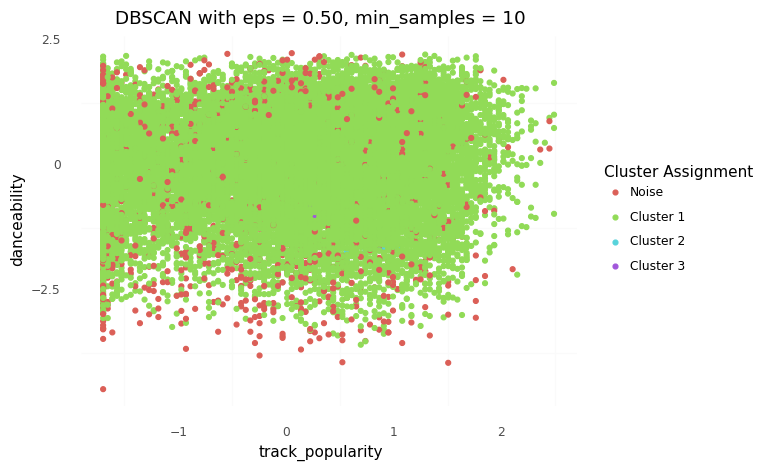

<ggplot: (331976397)>

In [79]:
(ggplot(X, aes(x = "track_popularity", y = "danceability", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.50, min_samples = 10"))

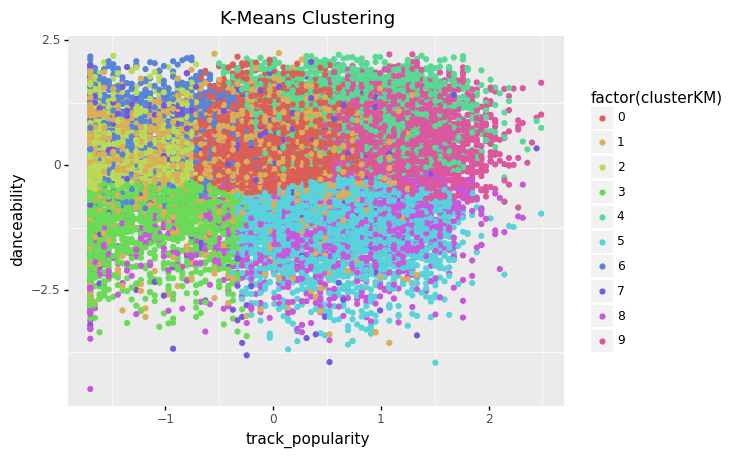

<ggplot: (338423281)>

In [80]:
(ggplot(X, aes(x = "track_popularity", y = "danceability", color = "factor(clusterKM)")) + geom_point() +
theme(panel_grid_major = element_blank()) +
labs(title = "K-Means Clustering"))

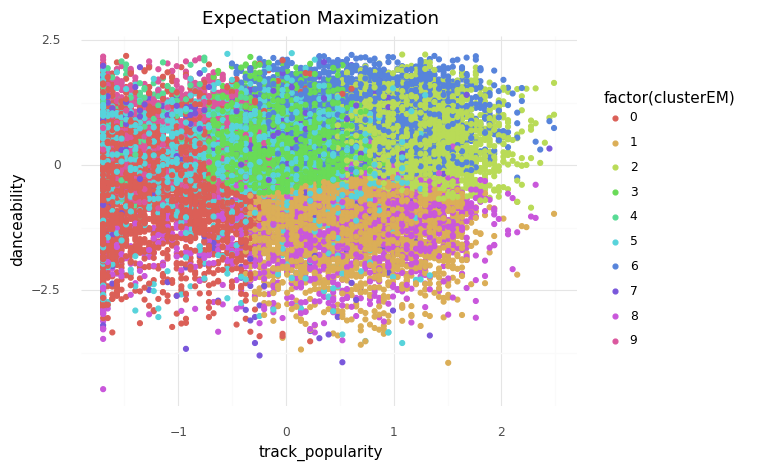

<ggplot: (341313157)>

In [81]:
(ggplot(X, aes(x = "track_popularity", y = "danceability", color = "factor(clusterEM)")) + geom_point() + theme_minimal() + labs(title = "Expectation Maximization"))

### **Caption 3**

After performing all three algorithms it is important to plot the data and color it by cluster in order to visualize how well each algorithm did when separating the data into clustering. This specific graph compares track_popularity and danceability for each of the algorithms and as you can see there is not a lot of cohesion and separation between the clusters. Cohesion refers to how memebers of a cluster are similar to each other, a good cohesion would mean that the data points are close to each other, meaning there is not a lot of distance between them. Separation is also quite poor. Separation referts to how close the clusters are from each other and from all three graphs you can see that there is almost no separation between the clusters, as they are all quite mixed together. Overall, all three models did a poor job in showing the 10 specified clusters clearly.

### Changes in the original question

Originally the question was posed regarding appropriately finding clustes by genre using album name, track_popularity and track_artist. The variables chosen would not work with the three unsupervised learning algorithms chosen in order to complete the analysis. Those algorithms can only be ran with continuous data and on the original question two out of three variables were categorical, which is why there needed to be changes done to the question so that we can actually conduct an analysis.

### Question 7 Analysis:

No, we can't as you can see from the silhoette scores on all three algorithms the model performed poorly in all three fronts, with the highest silhouette score being 0.35 with DBSCAN. Silhouette scores are a way to gauge if your unsupervised learving algorithm (algorithms without a label) worked well. They calculate the level of sepparation and cohesiveness of the clusters into one score. Although the silhouette score can tell us a lot about the cohesiveness and separation of variables, it is important to also plot those created clusters in order to visualize what the silhoeutte score is already telling us. The closer the silhouette score is to 1 the better it is because it means very good cohesion and separation between clusters. This is not the cause howeever, and the silhouette score was poor as were the plots of the variables and so unfortunately we cannot appropriately clusters songs using track_popularity, danceability, energy and instrumentalness.

One reason as to why we weren't able to appropriately cluster songs is because as we can see from plotting this data, the assumptions of each algorith works against us with these types of variables. For example, K-means and EM assume some sort of shape to the clusters, in which we clearly do not have when we look at the plotted graphs. K-means assumes clusters are spherical, meaning that the level of variation is the same in all directions and EM assumes clusters can be eliptical, meaning that the variance can be different in all directions. DBSCAN does not make any assumptions, but also does not perform well with overlapping/touching clusters which the model definetely has. 

### 8) Can we classify the data in mode with a decision tree using all other variables?

In [104]:
X = spotify[['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

y = spotify["mode"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
zscore = StandardScaler()
zscore.fit(X_train[['track_popularity', 
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']])

Xz_train = zscore.transform(X_train[['track_popularity', 
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']])
Xz_test = zscore.transform(X_test[['track_popularity', 
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']])

tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(Xz_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [105]:
print("Train Accuracy: ",accuracy_score(tree.predict(Xz_train), y_train))

print("Test Accuracy: ",accuracy_score(tree.predict(Xz_test), y_test))



Train Accuracy:  0.6775586353944563
Test Accuracy:  0.655863539445629


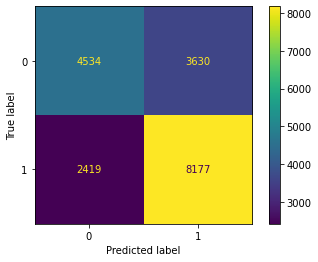

In [106]:
plot_confusion_matrix(tree,Xz_train, y_train)

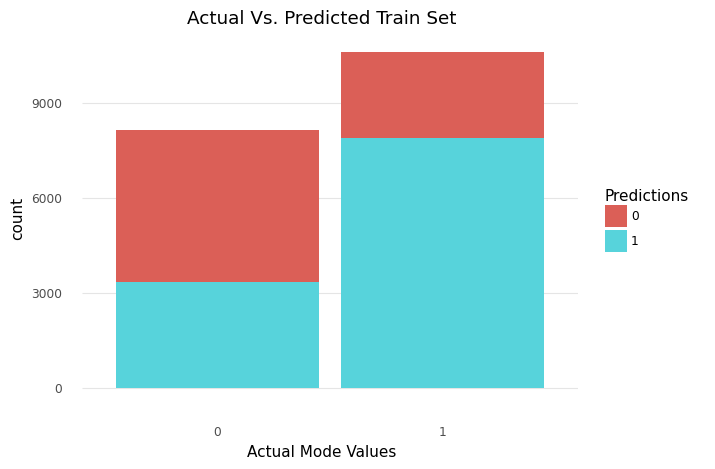

<ggplot: (338733633)>

In [92]:
true_vs_pred = pd.DataFrame({"predicted": tree.predict(Xz_train),"actual": y_train})


(ggplot(true_vs_pred, aes(x = "factor(actual)", fill = "factor(predicted)")) + geom_bar() + theme_minimal()+labs(title = "Actual Vs. Predicted Train Set", fill = "Predictions", x = "Actual Mode Values")+
theme(panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank(),
       panel_grid_minor_y = element_blank()))

### **Caption 1**

When making use of a decision tree algorithm is a way that we can classify data into different categories. Besides using an accuracy score in order to gage whether or not the model has done a good job prediction the outcome (mode) we can plot a bar graph with actual and predicted values in order to visualize the number of times our model was able to correctly predict the values.

This is the actual vs. predicted values bar graph of our train set (which is data used to fit our model). The blue indicates the number of times our model predicted the mode would be 1 (major) and red indicates when our mode was 0 (minor. As you can see, on the right hand bar on the x-axis (horizontal axis) indicates when our data explicitly indicates the mode is equal to 1, the bar is almost entirely blue which is a good thing, this means that more often than none the decision tree correctly predicted the actual values. The same occured when our values were 0, our bar is slightly more red than blue (which is what we want), but it is pretty dividded which means that the model did not do as good of a job predicting when the mode was 0.

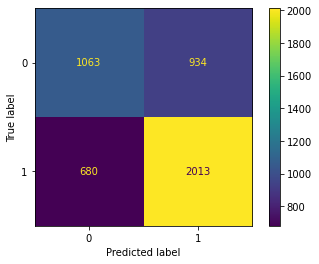

In [107]:
plot_confusion_matrix(tree,Xz_test, y_test)

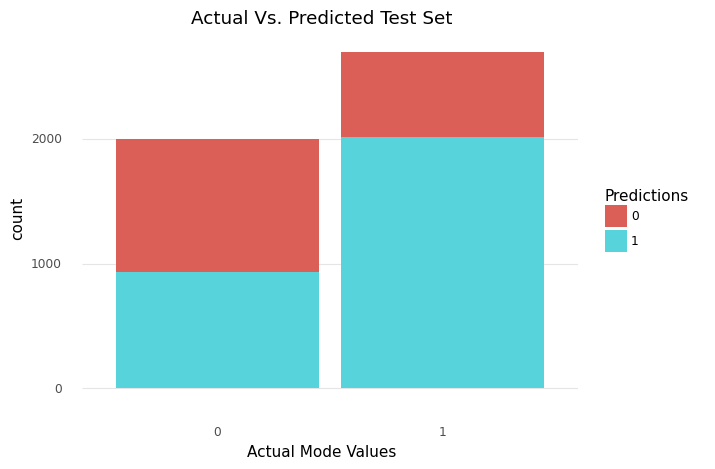

<ggplot: (344744197)>

In [108]:
true_vs_pred_test = pd.DataFrame({"predicted": tree.predict(Xz_test),"actual": y_test})


(ggplot(true_vs_pred_test, aes(x = "factor(actual)", fill = "factor(predicted)")) + geom_bar() + theme_minimal()+labs(title = "Actual Vs. Predicted Test Set", fill = "Predictions", x = "Actual Mode Values")+
theme(panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank(),
       panel_grid_minor_y = element_blank()))

### **Caption 2**

The bar graph above is a visual representation of the actual versus predicted values of our model. For when the values are 0 we would ideally prefer the graph to be mostly red because that would mean the model did mostly well in predicting the values. That is not the case as the bar is pretty much divided. On the other hand when the actual values are 1 the bar is mostly blue which means our model did a better job predicting it for when actual values were 1 than when they were 0.

### **Changes in the original question**

The original question was "Is there a hierarchical relationship between the variables?". Because of the amount of rows we have in this data set, the time it took too long to run the model and once it ran the dendogram was really hard to interpret and establish whether or not there were cohesions and separation. Because of that we decided to make use of a decision tree in order to see if we could classify the data in mode (major or minor) using all other vairiables.

### **Question 8 Analysis:** 

The basic idea of a decision tree is to split the data set into different dubsets of data. Every step of the decision tree process the algorithm is essentially selecting the best attribute, one that allows for the gini impurity (score on how well the split of the attribute was split into correct categories) in order to approriately predict the outcome in this case the mode (major or minor) of the tracks in the data set. Based on the accuracy score and the two visualization plots I would say that the algorithm actually did a pretty good job classifying the data into modes using all the other variables in the data set. 

In order for the decision tree to be generalizable (in other words address the trees' overfitness and how well the data performs in unseen data) we limited the depth of our tree, this means we limited the number of times our tree would be splot in order for our tree to not only perform well on our trainin data but also on unseen data. 

Based on the accuracy score, setting a max_depth for our tress positively impacted our accuracy, in other words, our model's ability to predict mode, and our model is only slightly overfit with an accuracy score of 0.67 and 0.65 for our train and test set respectively. Ideally we would want our scores to be as close to one as possible, and after plotting the two graphs above we are able to understand why the accuracies were around the 0.6 mark. Although our decision tree did a good job classifying the data in major mode, it was not ass successful with minor, and that is reflective of our accuracy scores as well.

All in all based on our visualization techniques and accuracy score we were able to classify the data using a decision tree with all other variables as predictors, but our model was better able to cetgorize the data when it comes to mode when it is equal to 1 than when it is 0.


### 9) Would PCA help us reduce dimensionality and produce a model that can accurately predict a song's popularity?

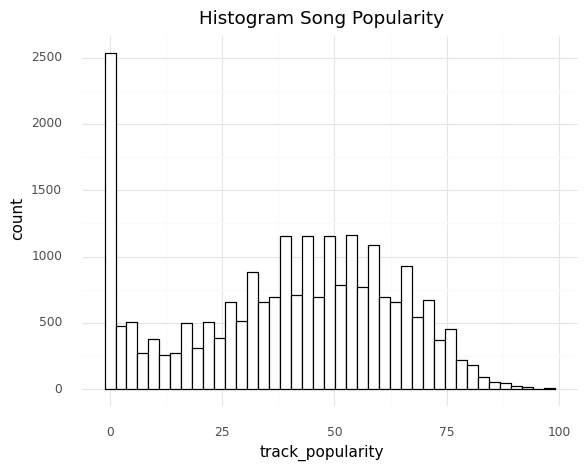

<ggplot: (342781773)>

In [86]:
#histogram of track popularity

(ggplot(spotify, aes("track_popularity"))+ 
 geom_histogram(color = "black", fill = "white") +
 theme_minimal() + ggtitle("Histogram Song Popularity"))

### **Caption 1**

Plotting a histogram against track popularity is a good way to have a visual representation of data distribution. This histogram is displaying the frequency of track_popularity and  this allos us to explore and have a better understanding of the outcome in our model. 

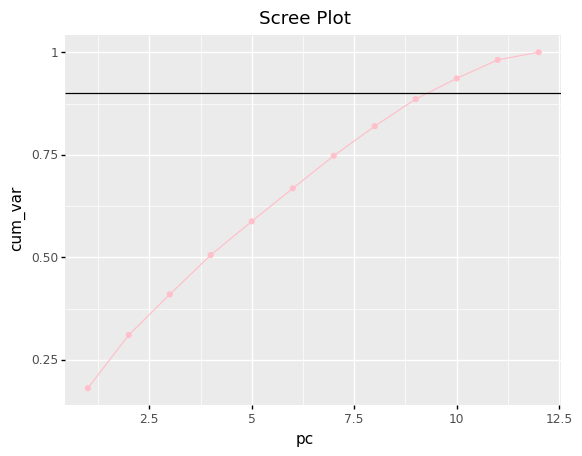

<ggplot: (341354769)>

In [87]:
predictors = ['danceability', 'energy', 'mode', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']
        


X = spotify[predictors]
y = spotify[["track_popularity"]]


#model validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

z = StandardScaler()
z.fit(X_train)

Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)



pca = PCA()
pca.fit(Xz_train)


pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(1,13),
                    "cum_var": pca.explained_variance_ratio_.cumsum()})


(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.90) + labs(title = "Scree Plot"))


### **Caption 2** 

The scree plot tells us how much each principal component contrains the information of the original information/variance in all 12 variables.

In this case we are looking at how many principal components it takes to retain the amount of information we want (cumulative sum). In this case depeneding where we draw a line it tells us how much of the total variation is explained by the first, second, third principal component. For example, if we want to draw a line at 90% variance, then we would see that about 9 principal components explain 90% of the variance we had in the original 12 variables.

This plot basically tells us that a lot of the variables are related to each other and that in order to reduce dimensionality we might not need all 13 of them to achieve a good model and result.

In [88]:
pcomps_train = pca.transform(Xz_train)
pcomps_train = pd.DataFrame(pcomps_train[:, 0:10])


pcomps_test = pca.transform(Xz_test)
pcomps_test = pd.DataFrame(pcomps_test[:, 0:10])

lr1 = LinearRegression()
lr1.fit(Xz_train, y_train)
print("all data train: ", lr1.score(Xz_train, y_train))
print("all data test: ", lr1.score(Xz_test, y_test))

#modeMod1
lr2 = LinearRegression()
lr2.fit(pcomps_train, y_train)
print("9 comp train:   ", lr2.score(pcomps_train, y_train))
print("9 comps test:   ", lr2.score(pcomps_test, y_test))



all data train:  0.06444782781242897
all data test:  0.0634453328211324
9 comp train:    0.052862153791988664
9 comps test:    0.04828233338347632


### Changes in the original question

The only changes that were made for this specific question was that we are not using all variables in the data set becasue PCA only allows for continuous variables to be analyzed.



### Question 9 Analysis:

In order to understand and be able to answer this question apropriately it is important to understand what PCA is.

Principal components analysis is a way to rotate the axes of our data in order to take advantages of the relationships betweeen all 50 variables we have in the data set. It essentially creates new set of axes (called principal components for each variable in the dataset) that are incredibly efficient in describing the variation in the data. PCA can be used as a method of dimensionality reductions because the rotation of the axis PCA is actually able to retain only a handful of our pricinpal components but still cover most, if not all the information in our original data, using a smaller set of variables.

Keeping that in mind when looking at the performance of our PCA model predictions is important, because since we are using way fewer variables in order to predict the same outcome, there is an unavoidable loss of information if you don't want to keep all 12 variables. In this case, by using PCA we are sacrificing a little bit of accuracy in order to use less variables.

The performance of both PCA and linear regression models were not great. When we scored our predictions for the model with all variables we have a r2 score of 0.07 for the train and 0.04 for the test. This is actually really bad. R2 is basically comparing a baseline model (where all you do is predict the mean) to a more advanced model like a regression model that uses variables X to predict Y. The more variation our model explains the higher the r2, and the better it's performing. Our r2 is very low, closest to 0 for both test and train sets. This basically means that our model is doing no better than just predicting the mean. The model is also overfit, which means that the train r2 scores are higher than the r2 scores for test set, and this usually indicate that the model is not great at predicting unseen data and is not as generalizable as we would want.


PCA did help us reduce dimensionality, because we were able to reduce our variables from 12 to 9, but that is not a lot of dimensionality reduction. Also, due to what we know about PCA we actually lost some accuracy by using PCA, especially because since we still have a lot of Principal components that needed to be used this tells us that there is not a lot of relationships between the variables and they all are pretty independent. You can see that PCA did not help our model to predict track_popularity more accurately by looking at the reduced r2 scores when compared to all the variables. The r2 for train lowered to 0.05 and 0.04 for the test, the only thing that we can see that PCA improved was reduce the complexity of the model and address overfitness since that was lowered when compared to the r2 scores of all the data. 
